In [1]:
# ติดตั้งไลบรารีที่จำเป็น
!pip install tensorflow
!pip install matplotlib
!pip install scipy


# นำเข้าไลบรารี
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy

In [2]:
train_dir = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Training'
test_dir = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Test'

In [3]:
# สร้างตัวประมวลผลสำหรับชุดข้อมูลการฝึก
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)

# สร้างตัวประมวลผลสำหรับชุดข้อมูลทดสอบ
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
# สร้างตัวป้อนข้อมูลสำหรับชุดฝึก
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# สร้างตัวป้อนข้อมูลสำหรับชุดทดสอบ
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [5]:
# กำหนดโมเดล Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/25
2202/2202 [==============================] - 1005s 456ms/step - loss: 0.4869 - accuracy: 0.8654 - val_loss: 0.2227 - val_accuracy: 0.9452
Epoch 2/25
2202/2202 [==============================] - 1065s 484ms/step - loss: 0.0867 - accuracy: 0.9727 - val_loss: 0.2114 - val_accuracy: 0.9503
Epoch 3/25
2202/2202 [==============================] - 986s 448ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.1725 - val_accuracy: 0.9572
Epoch 4/25
2202/2202 [==============================] - 977s 444ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.1721 - val_accuracy: 0.9632
Epoch 5/25
2202/2202 [==============================] - 984s 447ms/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.1877 - val_accuracy: 0.9653
Epoch 6/25
2202/2202 [==============================] - 1005s 456ms/step - loss: 0.0332 - accuracy: 0.9907 - val_loss: 0.1374 - val_accuracy: 0.9714
Epoch 7/25
2202/2202 [==============================] - 1033s 469ms/step - loss: 0.0281 - accuracy: 0.9924 - 

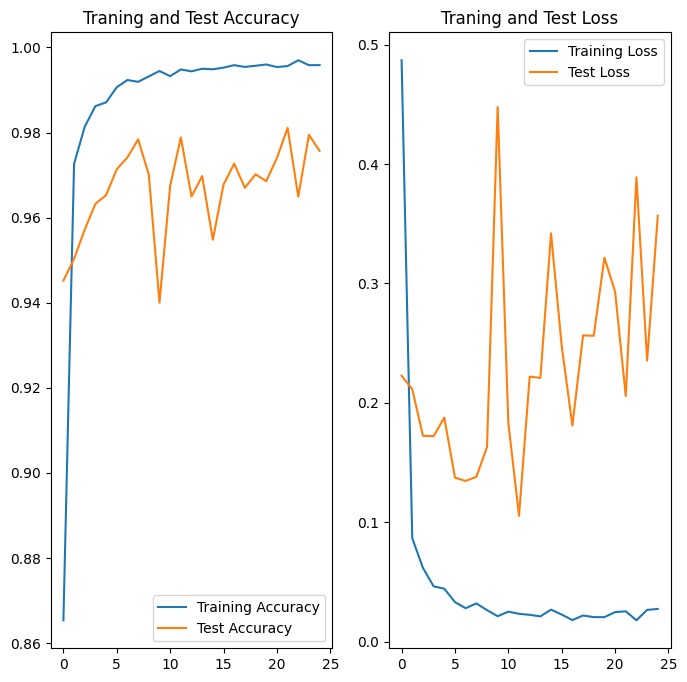

In [37]:
# import matplotlib.pyplot as plt

# # ประเมินความแม่นยำ
# acc = history.history['accuracy']
# loss = history.history['loss']

# # สร้างกราฟความแม่นยำและการสูญเสีย
# epochs_range = range(len(acc))  # ใช้จำนวน epochs ที่รันจริง
# plt.figure(figsize=(8, 8))

# # ความแม่นยำในการฝึก
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training Accuracy')

# # การสูญเสียในการฝึก
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.legend(loc='upper right')
# plt.title('Training Loss')

# plt.show()

# ประเมินความแม่นยำ
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ประเมินการสูญเสีย
loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้างกราฟความแม่นยำ
epochs_range = range(25)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and Test Accuracy')

# สร้างกราฟการสูญเสีย
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Traning and Test Loss')
plt.show()



In [41]:
# print(history.history['accuracy'])
print(history.history['val_accuracy'], "\n")
# print(history.history['loss'])
print(history.history['val_loss'])



[0.9452066421508789, 0.9503302574157715, 0.9572323560714722, 0.9632452726364136, 0.9653201103210449, 0.9713753461837769, 0.9741700291633606, 0.9784044623374939, 0.970104992389679, 0.9399983286857605, 0.9674796462059021, 0.9788702726364136, 0.9649813771247864, 0.9697662591934204, 0.9548187851905823, 0.9677760601043701, 0.9726880192756653, 0.9670138955116272, 0.9701896905899048, 0.9685806035995483, 0.9740006923675537, 0.9811145067214966, 0.9649389982223511, 0.9794631004333496, 0.9756944179534912] 

[0.22272160649299622, 0.21144546568393707, 0.1724603921175003, 0.17214101552963257, 0.18768568336963654, 0.13741375505924225, 0.13464953005313873, 0.1380525678396225, 0.162928506731987, 0.4477855861186981, 0.18328429758548737, 0.1054588034749031, 0.22203302383422852, 0.22091977298259735, 0.3420270085334778, 0.24766629934310913, 0.18099942803382874, 0.2565405070781708, 0.25624561309814453, 0.3215651214122772, 0.2931768596172333, 0.20577016472816467, 0.3889569938182831, 0.23540444672107697, 0.35

In [31]:
from tensorflow.keras.preprocessing import image

# โหลดภาพที่ต้องการทดสอบ
img_path = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Training\Apple Red 1\0_100.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ทำนายผล
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())

print(f'ผลการทำนาย: {class_labels[predicted_class[0]]}')


1/1 [==============================] - 0s 27ms/step
ผลการทำนาย: Apple Red 1


In [34]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# ลิงก์ภาพที่ต้องการโหลด
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtZIYcTI0Hjk1lcNrtjuIcVivvdyjWw9bJsQ&s'

# ดึงข้อมูลภาพจาก URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# ปรับขนาดภาพให้ตรงกับขนาดที่ต้องการ (100x100)
img = img.resize((100, 100))

# แปลงภาพเป็น array เพื่อให้ใช้ในโมเดลได้
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ทำนายผล
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())

print(f'ผลการทำนาย: {class_labels[predicted_class[0]]}')


1/1 [==============================] - 0s 33ms/step
ผลการทำนาย: Tomato not Ripened 1
